In [1]:
# Importing Libraries for parfume project
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import ast 

# Loading out dataset
parfumes = pd.read_csv('cleaned_frag_dataset.csv')

In [2]:
#Brands that created the most perfume variations 

top10_size = parfumes.groupby('brand')['perfume'].count().sort_values(ascending=False).head(10).reset_index() # converting series to df by reseting index

top10_size

,brand,perfume
0,avon,644
1,demeter fragrance,358
2,guerlain,332
3,victoria s secret,288
4,o boticario,241
5,dsh perfumes,234
6,novaya zarya,228
7,zara,224
8,natura,217
9,yves rocher,217


In [3]:
top10_size

,brand,perfume
0,avon,644
1,demeter fragrance,358
2,guerlain,332
3,victoria s secret,288
4,o boticario,241
5,dsh perfumes,234
6,novaya zarya,228
7,zara,224
8,natura,217
9,yves rocher,217


/var/folders/jq/9vrfyvt57yv6zsk7ddnttm3h0000gn/T/ipykernel_21114/589871413.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_size, x='perfume', y='brand', palette='magma')


Text(0.5, 0, 'Total of Perfumes')

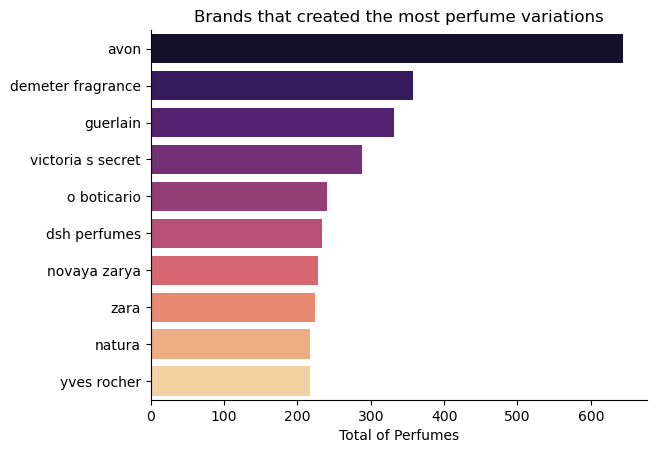

In [4]:
#Building Barplot 

sns.barplot(data=top10_size, x='perfume', y='brand', palette='magma')
sns.despine()

plt.title('Brands that created the most perfume variations')
plt.ylabel('')
plt.xlabel('Total of Perfumes')

In [5]:
# Cleaning from previous chapter


# Convert all values to strings first
parfumes['main_accords'] = parfumes['main_accords'].astype(str)
parfumes['notes'] = parfumes['notes'].astype(str)

# Since we have different datatypes we need to loop throught every row  

def safe_literal_eval(value):
    try: #we used --try-- insted of --if-- because we are not sure about type of date is iterated
        return ast.literal_eval(value)  # Try to convert the string to the list first
    except (ValueError, SyntaxError):  # is error then return what we had befor
        return value 

# Apply ast.literal_eval after converting everything to strings
parfumes['main_accords'] = parfumes['main_accords'].apply(safe_literal_eval)
parfumes['notes'] = parfumes['notes'].apply(safe_literal_eval)

# Function to ensure all values are lists
def ensure_list(value):
    if isinstance(value, list):
        return value  # If it's already a list, return it as is
    else:
        return [value]  # Otherwise, wrap the value in a list

# Apply the function to both 'main_accords' and 'notes' columns
parfumes['main_accords'] = parfumes['main_accords'].apply(ensure_list)
parfumes['notes'] = parfumes['notes'].apply(ensure_list)

print(parfumes['main_accords'].apply(type).unique())
print(parfumes['notes'].apply(type).unique())

# Finally everthing is list!

[<class 'list'>]
[<class 'list'>]


In [15]:
#So we can count each note separately

pafums_notes = parfumes.explode('notes')


In [31]:
# Convert lists in 'notes' to strings
pafums_notes['notes_str'] = pafums_notes['notes'].astype(str)

# Now grouping to count each one
grouped_notes = pafums_notes.groupby('notes_str').size().reset_index(name='count').sort_values(by='count', ascending=False)

top10_notes = grouped_notes.head(10)

top10_notes

,notes_str,count
593,Musk,2689
466,Jasmine,2009
25,Amber,1982
771,Sandalwood,1933
752,Rose,1808
883,Vanilla,1607
661,Patchouli,1567
78,Bergamot,1437
320,Floral Notes,1019
968,Woody Notes,991


/var/folders/jq/9vrfyvt57yv6zsk7ddnttm3h0000gn/T/ipykernel_21114/1866016273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_notes, x='count', y='notes_str', palette='magma')


Text(0.5, 0, 'Total of Perfumes')

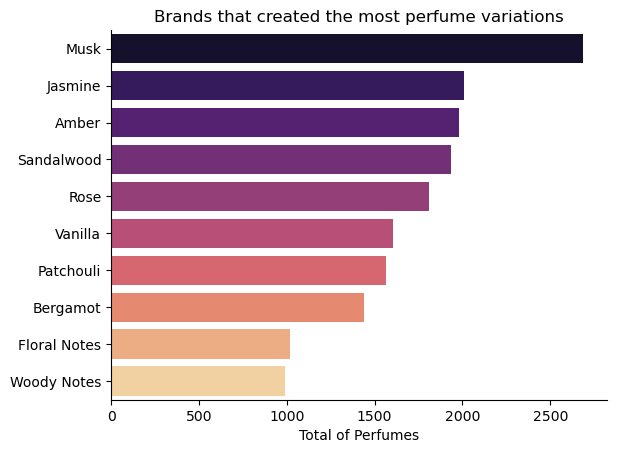

In [32]:
#Building Barplot 

sns.barplot(data=top10_notes, x='count', y='notes_str', palette='magma')
sns.despine()

plt.title('Brands that created the most perfume variations')
plt.ylabel('')
plt.xlabel('Total of Perfumes')

In [66]:
grouped_notes['count'] = grouped_notes['count'].astype(int)

notes = grouped_notes[grouped_notes['count']>10]

number_of_notes = notes.sum()

number_of_notes

notes_str    MuskJasmineAmberSandalwoodRoseVanillaPatchouli...
count                                                    62059
dtype: object

In [69]:
notes['percent_of_all'] = notes['count'] / 62059 *100

notes

/var/folders/jq/9vrfyvt57yv6zsk7ddnttm3h0000gn/T/ipykernel_21114/1875082031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notes['percent_of_all'] = notes['count'] / 62059 *100


,notes_str,count,percent_of_all
593,Musk,2689,4.332973
466,Jasmine,2009,3.237242
25,Amber,1982,3.193735
771,Sandalwood,1933,3.114778
752,Rose,1808,2.913357
...,...,...,...
257,Cupcake,11,0.017725
825,Sunflower,11,0.017725
351,Gin,11,0.017725
315,Fir Resin,11,0.017725


In [91]:
notes = notes.sort_values(by='percent_of_all', ascending=False).head(10)

notes

,notes_str,count,percent_of_all
593,Musk,2689,4.332973
466,Jasmine,2009,3.237242
25,Amber,1982,3.193735
771,Sandalwood,1933,3.114778
752,Rose,1808,2.913357
883,Vanilla,1607,2.589471
661,Patchouli,1567,2.525017
78,Bergamot,1437,2.315538
320,Floral Notes,1019,1.641986
968,Woody Notes,991,1.596867


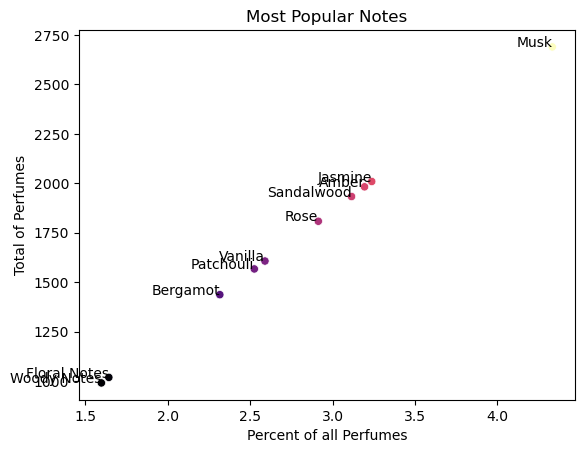

In [100]:
sns.scatterplot(data=notes, x='percent_of_all', y='count', palette='magma', hue='percent_of_all')
plt.legend().remove()
plt.xlabel('Percent of all Perfumes')
plt.ylabel('Total of Perfumes')
plt.title('Most Popular Notes')

for i in range(len(notes)):
    plt.text(notes['percent_of_all'].iloc[i], 
             notes['count'].iloc[i], 
             notes['notes_str'].iloc[i], 
             fontsize=10, ha='right')


In [162]:

year = parfumes.groupby('launch_year').size().sort_values(ascending=False).reset_index()

year = year[year['launch_year'] != 'Unknown']



In [163]:
year.rename(columns={0:'total'}, inplace=True)
year


,launch_year,total
1,2015.0,2994
2,2014.0,2652
3,2016.0,2593
4,2013.0,2346
5,2012.0,2221
...,...,...
162,1876.0,1
163,1874.0,1
164,1871.0,1
165,1870.0,1


In [170]:
year = year.sort_index(ascending=False)

In [174]:
year = year.tail(20)
year

,launch_year,total
20,1997.0,213
19,1998.0,219
18,1999.0,259
17,2002.0,310
16,2001.0,336
15,2000.0,355
14,2003.0,464
13,2004.0,471
12,2005.0,602
11,2006.0,813


Text(0.5, 1.0, 'Trend of Pefumes Over Last 20 Years')

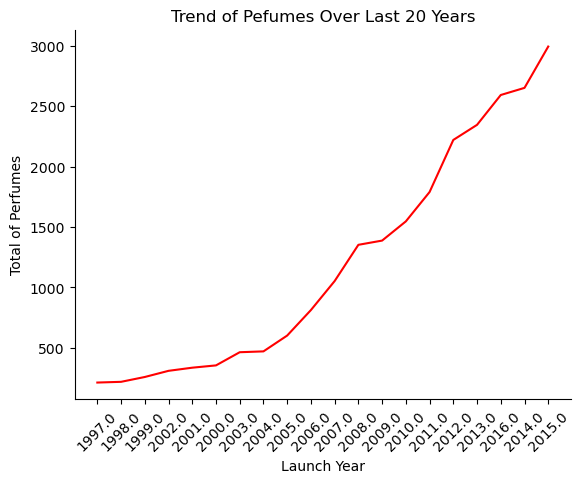

In [194]:

sns.lineplot(data=year, x='launch_year', y='total', color='red')
plt.xticks(rotation=45)
sns.despine()

plt.xlabel('Launch Year')
plt.ylabel('Total of Perfumes')
plt.title('Trend of Pefumes Over Last 20 Years')

In [190]:
parfumes

,brand,perfume,launch_year,main_accords,notes
0,18 21 man made,sweet tobacco spirits,2016.0,"[wine, vanilla, sweet, woody, aromatic]","[Citruses, Saffron, Tonka Bean, Vanilla, Exoti..."
1,40 notes perfume,cashmere musk,Unknown,"[woody, musky, balsamic, powdery, warm spicy, ...","[Sandalwood, Cedar, White Musk, Cashmere Wood]"
2,40 notes perfume,exotic ylang ylang,Unknown,"[yellow floral, white floral, sweet, musky, wo...","[Ylang-Ylang, Gardenia, Musk]"
3,40 notes perfume,exquisite amber,Unknown,"[balsamic, vanilla, amber, musky, warm spicy]","[Labdanum, Styrax, Benzoin, Vanilla, Musk]"
4,40 notes perfume,oudwood veil,Unknown,"[oud, amber, fresh spicy, balsamic, woody]","[Kephalis, Agarwood (Oud)]"
...,...,...,...,...,...
37918,urban rituelle,lemongrass blend,Unknown,"[citrus, fresh spicy, aromatic, herbal, woody]","[Lemongrass, Myrtle, Grapefruit, Eucalyptus]"
37919,urban rituelle,peach blossom,Unknown,"[sweet, honey, white floral, floral, powdery]","[Peach, Honey, Sweet Pea, Mimosa]"
37920,urban rituelle,pomegranate,Unknown,"[fruity, citrus, fresh, woody, sweet, sour]","[Pomegranate, Citruses, Red Berries]"
37921,urban rituelle,vanilla,Unknown,"[vanilla, caramel, milky, sweet, powdery]","[Vanilla, Caramel, Milk]"
